In [1]:
from gensim import corpora
from gensim import models

import pickle

In [2]:
NUM_TOPICS = 32
NUM_TOPIC_WORDS = 15

In [3]:
from collections import defaultdict
def get_filtered_words(docs):
    term_fre_dict = defaultdict(int)
    doc_fre_dict = defaultdict(int)
    
    for doc in docs:
        for word in doc:
            term_fre_dict[word] += 1
        for word in set(doc):
            doc_fre_dict[word] += 1
    
    max_doc_frequency = 1000
    min_doc_frequency = 3
    max_term_frequency = 7000
    min_term_frequency = 5
    
    doc_frequency_filtered = {k:v for k, v in doc_fre_dict.items() if ((v>=min_doc_frequency) and (v <= max_doc_frequency))}
    term_frequency_filtered = {k:v for k, v in term_fre_dict.items() if ((v>=min_term_frequency) and (v <= max_term_frequency))}
    both_satisfied = {k:v for k, v in term_frequency_filtered.items() if k in doc_frequency_filtered}
    
    return both_satisfied

In [4]:
def get_highest_topic(topic_list):
    highest_topic = 100
    highest_prob = 0
    for topic, prob in topic_list:
        if prob > highest_prob:
            highest_prob = prob
            highest_topic = topic
    return highest_topic, highest_prob

In [5]:
def build_doc_word_matrix(docs):
    dictionary = corpora.Dictionary(docs)
    corpus = []
    for doc in docs:
        bow = dictionary.doc2bow(doc)
        corpus.append(bow)

    return corpus, dictionary

In [6]:
def print_topic_words(model):
    f = open('topic_results_test.txt','w')
    for topic_id in range(model.num_topics):
        word_probs = model.show_topic(topic_id, NUM_TOPIC_WORDS)
        print("Topic ID: {}".format(topic_id))
        f.write(str(topic_id)+'\n')
        for word, prob in word_probs:
            print("\t{}\t{}".format(word, prob))
            f.write(str(word)+'\t'+str(prob)+'\n')
        print("\n")
    f.close()

In [7]:
def get_Noun_words(morphs):
    Noun_words = []
    for word, tag in morphs:
        if tag == 'Noun':
            Noun_words.append(word)
    return Noun_words

In [8]:
total_morphs = pickle.load(open('total_sections_morphs.p','rb'))  

In [9]:
total_morphs.keys()

dict_keys(['001-0008427957', '016-0001073431', '025-0002623216', '020-0002986787', '025-0002626012', '001-0008400554', '001-0008471993', '001-0008492305', '001-0008434380', '018-0003587920', '001-0008536209', '001-0008371541', '021-0002277310', '001-0008371268', '001-0008388693', '020-0002975221', '025-0002620589', '020-0002988664', '008-0003688138', '001-0008498013', '001-0008492213', '421-0002172893', '001-0008478298', '001-0008497062', '001-0008493253', '001-0008477301', '001-0008468504', '366-0000327562', '001-0008568834', '001-0008529334', '021-0002278173', '437-0000126297', '001-0008461148', '001-0008575555', '011-0002859078', '025-0002629659', '032-0002696744', '022-0003078593', '009-0003754578', '001-0008399774', '001-0008400724', '001-0008521224', '079-0002843298', '001-0008451920', '421-0002164635', '052-0000868297', '001-0008472687', '055-0000418482', '081-0002722756', '001-0008375435', '001-0008459602', '421-0002097511', '422-0000194113', '028-0002323355', '001-0008465922',

In [10]:
total_morphs['001-0008427957']['content']

[('매출', 'Noun'),
 ('기준', 'Noun'),
 ('2', 'Number'),
 ('천', 'Noun'),
 ('개사', 'Noun'),
 ('조사', 'Noun'),
 ('…', 'Foreign'),
 ('억대', 'Noun'),
 ('연봉', 'Noun'),
 ('14', 'Number'),
 ('곳', 'Noun'),
 ('(', 'Punctuation'),
 ('서울', 'Noun'),
 ('=', 'Punctuation'),
 ('연합뉴스', 'Noun'),
 (')', 'Punctuation'),
 ('옥철', 'Noun'),
 ('기자', 'Noun'),
 ('=', 'Punctuation'),
 ('매출', 'Noun'),
 ('1', 'Number'),
 ('조원', 'Noun'),
 ('넘는', 'Verb'),
 ('대기업', 'Noun'),
 ('에', 'Josa'),
 ('다니는', 'Verb'),
 ('직원', 'Noun'),
 ('이', 'Josa'),
 ('매출', 'Noun'),
 ('1', 'Number'),
 ('천억원', 'Noun'),
 ('미만', 'Noun'),
 ('중소기업', 'Noun'),
 ('직원', 'Noun'),
 ('보다', 'Josa'),
 ('한', 'Verb'),
 ('해', 'Noun'),
 ('2', 'Number'),
 ('천', 'Noun'),
 ('500', 'Number'),
 ('만원', 'Noun'),
 ('정도', 'Noun'),
 ('더', 'Noun'),
 ('버', 'Noun'),
 ('는', 'Josa'),
 ('것', 'Noun'),
 ('으로', 'Josa'),
 ('나타났', 'Verb'),
 ('다', 'Eomi'),
 ('이', 'Noun'),
 ('기준', 'Noun'),
 ('으로', 'Josa'),
 ('가르', 'Verb'),
 ('면', 'Eomi'),
 ('대기업', 'Noun'),
 ('평균', 'Noun'),
 ('연봉', 'Noun'),
 

In [11]:
total_morphs['001-0008427957'].keys()

dict_keys(['text_title', 'paper_id', 'content'])

In [12]:
total_Noun_words = {}
for key in total_morphs.keys():
    morphs = total_morphs[key]['content']
    total_Noun_words[key] ={}
    total_Noun_words[key]['words']=get_Noun_words(morphs)
    total_Noun_words[key]['paper_id']=total_morphs[key]['paper_id']
    total_Noun_words[key]['text_title']= total_morphs[key]['text_title']

In [13]:
article_ids = []
text_titles = []
documents =[]
for key in total_Noun_words.keys():
    article_ids.append(total_Noun_words[key]['paper_id'])
    text_titles.append(total_Noun_words[key]['text_title'])
    document = total_Noun_words[key]['words']
    documents.append(document)

In [14]:
documents[0]

['매출',
 '기준',
 '천',
 '개사',
 '조사',
 '억대',
 '연봉',
 '곳',
 '서울',
 '연합뉴스',
 '옥철',
 '기자',
 '매출',
 '조원',
 '대기업',
 '직원',
 '매출',
 '천억원',
 '미만',
 '중소기업',
 '직원',
 '해',
 '천',
 '만원',
 '정도',
 '더',
 '버',
 '것',
 '이',
 '기준',
 '대기업',
 '평균',
 '연봉',
 '천',
 '만원',
 '중소기업',
 '천',
 '만원',
 '중소기업',
 '연봉',
 '대기업',
 '수준',
 '지난해',
 '국내',
 '천대',
 '기업',
 '중',
 '직원',
 '억대',
 '연봉',
 '손',
 '쥐',
 '여준',
 '기업',
 '모두',
 '곳',
 '집계',
 '장기',
 '불황',
 '전년',
 '곳',
 '대비',
 '크게',
 '일',
 '한국',
 '만',
 '기업',
 '연구소',
 '소장',
 '오일',
 '선',
 '최근',
 '년',
 '매출',
 '기준',
 '국내',
 '천대',
 '기업',
 '직원',
 '평균',
 '보수',
 '를',
 '자료',
 '지난해',
 '천대',
 '기업',
 '평균',
 '연봉',
 '천',
 '만원',
 '조사',
 '월급',
 '만원',
 '꼴',
 '평균',
 '연봉',
 '전년',
 '이번',
 '조사',
 '사업',
 '보고서',
 '상장',
 '비상',
 '장사',
 '매출',
 '기준',
 '분류',
 '천대',
 '기업',
 '가운데',
 '매출',
 '액',
 '순위',
 '상위',
 '기업',
 '직원',
 '평균',
 '연봉',
 '천',
 '만원',
 '하위',
 '기업',
 '직원',
 '평균',
 '연봉',
 '천',
 '만원',
 '천',
 '만원',
 '중소기업',
 '대기업',
 '인재',
 '쏠림',
 '현상',
 '완화',
 '조사',
 '결과',
 '매출',
 '조원',
 '대기업',
 '직원',
 '매출',
 '천억원',
 '미

In [15]:
f_stop = open('stop_words.txt', 'r', encoding='utf-8')
stop_words = []
for word in f_stop.readlines():
    stop_word = word.strip()
    stop_words.append(stop_word)
f_stop.close()

In [16]:
#docs_filtered = [[term for term in doc if term not in stop_words and len(term)>1] for doc in documents]
both_satisfied = get_filtered_words(documents)
docs_filtered = [[term for term in doc if term in both_satisfied and term not in stop_words and len(term)>1] for doc in documents]

In [17]:
docs_filtered[0]

['매출',
 '개사',
 '억대',
 '연봉',
 '옥철',
 '매출',
 '조원',
 '대기업',
 '직원',
 '매출',
 '천억원',
 '미만',
 '중소기업',
 '직원',
 '대기업',
 '평균',
 '연봉',
 '중소기업',
 '중소기업',
 '연봉',
 '대기업',
 '천대',
 '직원',
 '억대',
 '연봉',
 '여준',
 '집계',
 '장기',
 '불황',
 '전년',
 '대비',
 '크게',
 '연구소',
 '소장',
 '오일',
 '매출',
 '천대',
 '직원',
 '평균',
 '보수',
 '천대',
 '평균',
 '연봉',
 '월급',
 '평균',
 '연봉',
 '전년',
 '보고서',
 '상장',
 '비상',
 '장사',
 '매출',
 '분류',
 '천대',
 '매출',
 '순위',
 '상위',
 '직원',
 '평균',
 '연봉',
 '하위',
 '직원',
 '평균',
 '연봉',
 '중소기업',
 '대기업',
 '인재',
 '쏠림',
 '현상',
 '완화',
 '매출',
 '조원',
 '대기업',
 '직원',
 '매출',
 '천억원',
 '미만',
 '중소기업',
 '직원',
 '평균',
 '연봉',
 '집계',
 '대기업',
 '직원',
 '한해',
 '중소기업',
 '직원',
 '얘기',
 '대기업',
 '직원',
 '보수',
 '치면',
 '중소기업',
 '직원',
 '연봉',
 '전년',
 '격차',
 '약간',
 '대기업',
 '중소기업',
 '임금',
 '격차',
 '연구소',
 '오일',
 '소장',
 '매출',
 '이익',
 '업종',
 '달라',
 '보수',
 '격차',
 '현실',
 '중소기업',
 '보수',
 '대기업',
 '우수',
 '인재',
 '대기업',
 '몰리',
 '쏠림',
 '현상',
 '완화',
 '작년',
 '중소기업',
 '대기업',
 '연봉',
 '연봉',
 '천만원',
 '단위',
 '천만원',
 '평균',
 '보수',
 '다음',
 '천만원',
 '업종',
 '별로',
 '정유',
 '

In [18]:
corpus, dictionary = build_doc_word_matrix(docs_filtered)
# corpus = dtm based on frequency

In [19]:
#Dctionary = corpora.Dictionary(docs_filtered) # 각 단어에 고유 번호 부여
#Filter out words that occur less than 5 documents, or more than 50% of the documents.
#dictionary.filter_extremes(no_below=5, no_above=0.5)

In [20]:
#corpus = [dictionary.doc2bow(doc) for doc in docs_filtered] # 각 문서를 벡터로 표현

In [21]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 17702
Number of documents: 7837


In [22]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 3),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 11),
 (10, 1),
 (11, 1),
 (12, 9),
 (13, 1),
 (14, 2),
 (15, 1),
 (16, 1),
 (17, 2),
 (18, 10),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 2),
 (25, 1),
 (26, 1),
 (27, 2),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 2),
 (33, 1),
 (34, 1),
 (35, 3),
 (36, 4),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 2),
 (41, 18),
 (42, 1),
 (43, 2),
 (44, 1),
 (45, 2),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 2),
 (52, 1),
 (53, 1),
 (54, 2),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 4),
 (59, 2),
 (60, 1),
 (61, 4),
 (62, 1),
 (63, 2),
 (64, 1),
 (65, 10),
 (66, 17),
 (67, 2),
 (68, 5),
 (69, 6),
 (70, 2),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 18),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 2),
 (85, 1),
 (86, 4),
 (87, 1)]

In [23]:
lda_model = models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS,
                        id2word=dictionary,
                        alpha='auto')
print_topic_words(lda_model)

Topic ID: 0
	은행	0.019572891294956207
	대출	0.017176002264022827
	자본	0.011562964878976345
	국책	0.010130906477570534
	제주	0.009373964741826057
	부총리	0.008733876049518585
	구조조정	0.00824978481978178
	확충	0.008088071830570698
	시행	0.008066819049417973
	출자	0.007797113619744778
	장관	0.007280516903847456
	중앙은행	0.006754173431545496
	총재	0.0067029083147645
	지원	0.006630872841924429
	금융	0.0062070623971521854


Topic ID: 1
	북한	0.05994100123643875
	발사	0.023055292665958405
	미사일	0.014904980547726154
	무수단	0.008508967235684395
	시험	0.007417826913297176
	일본	0.0067765857093036175
	훈련	0.005886957049369812
	탄도미사일	0.005299023352563381
	제재	0.005125844851136208
	당국	0.005091428756713867
	방류	0.004748096223920584
	비행	0.004747619386762381
	도발	0.004717878066003323
	김정은	0.0046506160870194435
	추정	0.004260303918272257


Topic ID: 2
	국민의당	0.012640241533517838
	선거	0.007460476830601692
	홍보	0.007340211886912584
	의혹	0.007335085887461901
	리베이트	0.007000804878771305
	검찰	0.0055585079826414585
	거부권	0.005516220815479755
	총선	0.0050913393497

Topic ID: 29
	영국	0.017986351624131203
	달러	0.01629135012626648
	시트	0.01554692629724741
	브렉	0.015259316191077232
	거래	0.011327782645821571
	수석	0.00888625718653202
	주식	0.008449258282780647
	검사	0.00817206408828497
	하락	0.008044230751693249
	환율	0.007894712500274181
	가치	0.007348791230469942
	탈퇴	0.006353334523737431
	넥슨	0.006179265212267637
	부동산	0.005892359185963869
	일본	0.0058760857209563255


Topic ID: 30
	가격	0.02807709015905857
	아파트	0.02300035022199154
	분양	0.019315080717206
	거래	0.013645495288074017
	주택	0.012418423779308796
	평균	0.00901306327432394
	부동산	0.007937264628708363
	공급	0.00714070675894618
	상승	0.007108056452125311
	단지	0.006952304858714342
	전세	0.006635780446231365
	강남	0.006605946458876133
	재건축	0.006591038312762976
	청약	0.005803270731121302
	가구	0.005213020369410515


Topic ID: 31
	검찰	0.04525230452418327
	검사	0.02304137498140335
	변호사	0.022257614880800247
	의혹	0.01740323379635811
	부장	0.013094691559672356
	구속	0.010789289139211178
	이씨	0.008763764053583145
	영장	0.008227244950830936
	재판	0.008003126

In [24]:
lda_model.get_document_topics(corpus[0], minimum_probability=0.1)

[(3, 0.36343575), (17, 0.57583904)]

In [25]:
for i in range(10):
    print(article_ids[i])
    print(text_titles[i])
    topics_list = lda_model.get_document_topics(corpus[i])
    print(topics_list)
    hi_topic, hi_prob = get_highest_topic(topics_list)
    print(hi_topic, hi_prob)
    
    print('\n')

001-0008427957
대기업 연봉 6천700만원…中企보다 2천500만원 더 …
[(3, 0.3634745), (17, 0.5758312), (21, 0.055952772)]
17 0.5758312


016-0001073431
［주택연금의 경제학①］불안한 노후…주택연금 창…
[(0, 0.019096013), (12, 0.065860465), (24, 0.26714256), (25, 0.016644847), (28, 0.6251579)]
28 0.6251579


025-0002623216
이상돈 “김수민 공천 의혹 조사, 안철수 의지에 달…
[(2, 0.9959662)]
2 0.9959662


020-0002986787
[단독]5시 넘으면 ‘눈치’… 말뿐인 종일보육
[(6, 0.5438833), (8, 0.3260797), (24, 0.1247175)]
6 0.5438833


025-0002626012
[카드뉴스] 1950년 6월 27일, 허름한 군 트럭에 금…
[(4, 0.32783931), (10, 0.5414519)]
10 0.5414519


001-0008400554
'간호사 연쇄 성추행 사건' 삼성의료원 육교에 CC…
[(2, 0.014957267), (8, 0.35036188), (12, 0.026269313), (15, 0.056906484), (19, 0.39403582), (23, 0.11441616), (30, 0.032039538)]
19 0.39403582


001-0008471993
미국행 접고 국회직 수락한 우윤근 "개헌특위 설치…
[(5, 0.5624461), (6, 0.18472373), (9, 0.01696156), (14, 0.14805533), (18, 0.0111396), (25, 0.06224381)]
5 0.5624461


001-0008492305
한민구 "北 도발 지속하면 자멸" 경고…전군 주요…
[(1, 0.22871676), (2, 0.06831527), (7, 0.6544153), (8, 0.033

# Log perplexity

In [15]:
lda_model.log_perplexity(corpus)

-8.143294771147957

In [17]:
start1 = 2
limit1 = 40
step1 = 6
perplexity_scores=[]
for num_topics in range(start1, limit1, step1):
    model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                    id2word=dictionary,
                    alpha='auto')
    perplexity_scores.append(lda_model.log_perplexity(corpus))

In [17]:
perplexity_scores

[-8.143291328535637,
 -8.143335898434648,
 -8.1433263262556,
 -8.143306787142548,
 -8.143335458399463,
 -8.143308886887459,
 -8.143316449151095]

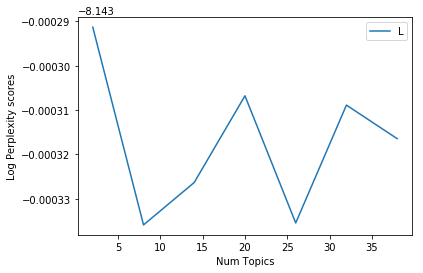

In [18]:
import matplotlib.pyplot as plt
x = range(start1, limit1, step1)
plt.plot(x, perplexity_scores)
plt.xlabel("Num Topics")
plt.ylabel("Log Perplexity scores")
plt.legend(("Log Perplexity"), loc='best')
plt.show()

# Coherence value

In [21]:
from gensim.models import CoherenceModel

In [22]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                        id2word=dictionary,
                        alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [23]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs_filtered, start=2, limit=40, step=6)

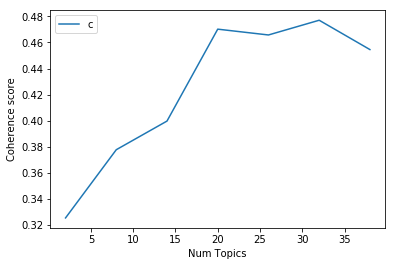

In [32]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [21]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [22]:
prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)

C:\Users\Sang\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [23]:
pyLDAvis.display(prepared_data)

In [21]:
pyLDAvis.save_html(prepared_data, 'LDAvis.html')

# 각 단어별 주제 확률 분포 구하기

In [22]:
topics_terms_prob = lda_model.get_topics()

In [23]:
topics_terms_prob.shape

(32, 17702)

In [24]:
topics_terms_prob[:,0]

array([0.00234662, 0.00043946, 0.00076716, 0.00101845, 0.00176091,
       0.00032405, 0.00114549, 0.00087089, 0.00033617, 0.00068748,
       0.00115797, 0.00115417, 0.00097576, 0.00063061, 0.00134147,
       0.00056416, 0.00091615, 0.00050197, 0.00066562, 0.00032532,
       0.00101187, 0.00064697, 0.00094957, 0.0003515 , 0.0003903 ,
       0.00096077, 0.00101995, 0.00067748, 0.00145456, 0.00043453,
       0.00042344, 0.00062045], dtype=float32)

In [25]:
LDA_words = []
for k in lda_model.id2word:
    LDA_words.append(lda_model.id2word[k])

In [26]:
LDA_words[:10]

['각각', '개사', '건설', '격차', '고액', '다음', '단연', '단위', '달라', '대기업']

In [27]:
import numpy as np

In [28]:
np.linalg.norm(topics_terms_prob[:,1]-topics_terms_prob[:,0])

0.005040408

# 각 단어별 주제 확률 분포 구하기

In [21]:
dictionary[0]

'각각'

단어의 id를 이용하여 단어를 추출

In [23]:
words = []
for k in lda_model.id2word:
    words.append(lda_model.id2word[k])

In [44]:
len(words)

17702

In [43]:
print(words[:20])

['각각', '개사', '건설', '격차', '고액', '다음', '단연', '단위', '달라', '대기업', '대비', '롯데', '매출', '몰리', '미만', '반면', '별로', '보고서', '보수', '분류']


In [29]:
words_dict={}
for i, word in enumerate(words):
    words_dict[word]=i

In [25]:
import numpy as np

In [27]:
topics_terms = lda_model.state.get_lambda()

In [28]:
topics_terms_proba = np.apply_along_axis(lambda x: x/x.sum(),1,topics_terms)

In [50]:
# 각 단어의 vector값 찾기, lda 결과를 이용
words_vectors =[]
for word in words:
    word_id = words_dict[word]
#     print(word, word_id, np.argmax(topics_terms_proba[:,word_id]), np.max(topics_terms_proba[:,word_id]))
    words_vectors.append(topics_terms_proba[:,word_id])

In [35]:
words_vectors[0]

array([0.00076944, 0.00077307, 0.00065745, 0.00055214, 0.00053046,
       0.00095415, 0.0002315 , 0.00036521, 0.00126805, 0.0005856 ,
       0.00069747, 0.00040933, 0.00076401, 0.0004752 , 0.00049345,
       0.00101776, 0.00090515, 0.00054887, 0.00048226, 0.00156856,
       0.00026295, 0.00206214, 0.00092678, 0.00117376, 0.00144258,
       0.00022433, 0.00105844, 0.00131164, 0.00051965, 0.00053203,
       0.00028841, 0.00059985], dtype=float32)

In [36]:
np.linalg.norm(words_vectors[0]-words_vectors[1])

0.004607997

In [38]:
np.dot(words_vectors[0], words_vectors[1])/(np.linalg.norm(words_vectors[0])*np.linalg.norm(words_vectors[1]))

0.48024225

In [39]:
np.dot(words_vectors[0], words_vectors[2])/(np.linalg.norm(words_vectors[0])*np.linalg.norm(words_vectors[2]))

0.5642765

In [48]:
word1 = '대기업'
word2 = '롯데'
word1_id = words_dict[word1]
word2_id = words_dict[word2]
np.dot(words_vectors[word1_id], words_vectors[word2_id])/(np.linalg.norm(words_vectors[word1_id])*np.linalg.norm(words_vectors[word2_id]))

0.13816823

In [41]:
word1 = '각각'
word2 = '개사'
word1_id = words_dict[word1]
word2_id = words_dict[word2]
np.dot(words_vectors[word1_id], words_vectors[word2_id])/(np.linalg.norm(words_vectors[word1_id])*np.linalg.norm(words_vectors[word2_id]))

0.48024225

In [51]:
word1 = '후보'
word2 = '출마'
word1_id = words_dict[word1]
word2_id = words_dict[word2]
np.dot(words_vectors[word1_id], words_vectors[word2_id])/(np.linalg.norm(words_vectors[word1_id])*np.linalg.norm(words_vectors[word2_id]))

0.9695528